In [1]:
import os
import requests
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
import json
import pandas as pd
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
response = requests.get('https://raw.githubusercontent.com/ganeshkcs/EVA4B2/master/S12/annotations/Dogs_coco.json')
data = response.json()

In [3]:
annotations_df = pd.DataFrame.from_dict(data['annotations'])
images_df = pd.DataFrame.from_dict(data['images'])
categories_df = pd.DataFrame.from_dict(data['categories'])

images_df = images_df.drop(columns = ['license','date_captured' ])
annotations_df = annotations_df.drop(columns = ['id','iscrowd'])
categories_df = categories_df.drop(columns=['supercategory']).rename(columns = {'id':'category_id'})

In [4]:
annotations_df.head(10)

,segmentation,area,bbox,image_id,category_id
0,"[[44, 27, 260, 27, 260, 177, 44, 177]]",32400,"[44, 27, 216, 150]",1,1
1,"[[54, 20, 168, 20, 168, 103, 54, 103]]",9462,"[54, 20, 114, 83]",2,1
2,"[[28, 25, 200, 25, 200, 175, 28, 175]]",25800,"[28, 25, 172, 150]",3,1
3,"[[33, 25, 233, 25, 233, 175, 33, 175]]",30000,"[33, 25, 200, 150]",4,1
4,"[[48, 21, 169, 21, 169, 171, 48, 171]]",18150,"[48, 21, 121, 150]",5,1
5,"[[22, 7, 153, 7, 153, 167, 22, 167]]",20960,"[22, 7, 131, 160]",6,1
6,"[[42, 28, 195, 28, 195, 181, 42, 181]]",23409,"[42, 28, 153, 153]",7,1
7,"[[100, 4, 195, 4, 195, 161, 100, 161]]",14915,"[100, 4, 95, 157]",8,1
8,"[[71, 18, 191, 18, 191, 170, 71, 170]]",18240,"[71, 18, 120, 152]",9,1
9,"[[29, 16, 282, 16, 282, 115, 29, 115]]",25047,"[29, 16, 253, 99]",10,1


In [5]:
images_df.head(10)

,id,width,height,file_name
0,1,268,188,dog50.jpg
1,2,275,183,dog49.jpg
2,3,272,185,dog48.jpg
3,4,275,183,dog47.jpg
4,5,224,224,dog46.jpg
5,6,259,194,dog45.jpg
6,7,259,194,dog44.jpg
7,8,300,168,dog43.jpg
8,9,275,183,dog42.jpg
9,10,347,145,dog41.jpg


In [6]:
df = images_df.merge(annotations_df,left_on='id', right_on='image_id')
df = df.merge(categories_df,left_on='category_id', right_on='category_id')

In [7]:
df.head(5)

,id,width,height,file_name,segmentation,area,bbox,image_id,category_id,name
0,1,268,188,dog50.jpg,"[[44, 27, 260, 27, 260, 177, 44, 177]]",32400,"[44, 27, 216, 150]",1,1,dogs
1,2,275,183,dog49.jpg,"[[54, 20, 168, 20, 168, 103, 54, 103]]",9462,"[54, 20, 114, 83]",2,1,dogs
2,3,272,185,dog48.jpg,"[[28, 25, 200, 25, 200, 175, 28, 175]]",25800,"[28, 25, 172, 150]",3,1,dogs
3,4,275,183,dog47.jpg,"[[33, 25, 233, 25, 233, 175, 33, 175]]",30000,"[33, 25, 200, 150]",4,1,dogs
4,5,224,224,dog46.jpg,"[[48, 21, 169, 21, 169, 171, 48, 171]]",18150,"[48, 21, 121, 150]",5,1,dogs


In [8]:
width = []
height = []
x = []
y = []
for i in range(0,len(df)):
    x.append(df['bbox'][i][0])
    y.append(df['bbox'][i][1])
    width.append(df['bbox'][i][2])
    height.append(df['bbox'][i][3])
df['x'], df['y'],df['bbox_width'], df['bbox_height'] = x, y, width, height

In [9]:
df.head(5)

,id,width,height,file_name,segmentation,area,bbox,image_id,category_id,name,x,y,bbox_width,bbox_height
0,1,268,188,dog50.jpg,"[[44, 27, 260, 27, 260, 177, 44, 177]]",32400,"[44, 27, 216, 150]",1,1,dogs,44,27,216,150
1,2,275,183,dog49.jpg,"[[54, 20, 168, 20, 168, 103, 54, 103]]",9462,"[54, 20, 114, 83]",2,1,dogs,54,20,114,83
2,3,272,185,dog48.jpg,"[[28, 25, 200, 25, 200, 175, 28, 175]]",25800,"[28, 25, 172, 150]",3,1,dogs,28,25,172,150
3,4,275,183,dog47.jpg,"[[33, 25, 233, 25, 233, 175, 33, 175]]",30000,"[33, 25, 200, 150]",4,1,dogs,33,25,200,150
4,5,224,224,dog46.jpg,"[[48, 21, 169, 21, 169, 171, 48, 171]]",18150,"[48, 21, 121, 150]",5,1,dogs,48,21,121,150


In [10]:
# Normalized image

df['Norm_bbox_width'], df['Norm_bbox_height'] = df['bbox_width']/df['width'], df['bbox_height']/df['height']

df['Norm_x'], df['Norm_y'] = df['x']/df['width'], df['y']/df['height']

In [11]:
df.head(5)

,id,width,height,file_name,segmentation,area,bbox,image_id,category_id,name,x,y,bbox_width,bbox_height,Norm_bbox_width,Norm_bbox_height,Norm_x,Norm_y
0,1,268,188,dog50.jpg,"[[44, 27, 260, 27, 260, 177, 44, 177]]",32400,"[44, 27, 216, 150]",1,1,dogs,44,27,216,150,0.805970,0.797872,0.164179,0.143617
1,2,275,183,dog49.jpg,"[[54, 20, 168, 20, 168, 103, 54, 103]]",9462,"[54, 20, 114, 83]",2,1,dogs,54,20,114,83,0.414545,0.453552,0.196364,0.109290
2,3,272,185,dog48.jpg,"[[28, 25, 200, 25, 200, 175, 28, 175]]",25800,"[28, 25, 172, 150]",3,1,dogs,28,25,172,150,0.632353,0.810811,0.102941,0.135135
3,4,275,183,dog47.jpg,"[[33, 25, 233, 25, 233, 175, 33, 175]]",30000,"[33, 25, 200, 150]",4,1,dogs,33,25,200,150,0.727273,0.819672,0.120000,0.136612
4,5,224,224,dog46.jpg,"[[48, 21, 169, 21, 169, 171, 48, 171]]",18150,"[48, 21, 121, 150]",5,1,dogs,48,21,121,150,0.540179,0.669643,0.214286,0.093750


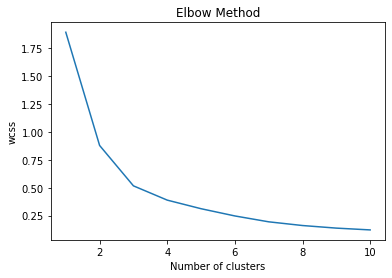

In [12]:


from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

wcss=[]
kmeans_data = df.iloc[:,[14,15]].values # getting Norm_bbox_width and Norm_bbox_height

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter = 300,n_init=10,random_state=0)
  kmeans.fit(kmeans_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter = 300,n_init=10,random_state=0)

y_kmeans=kmeans.fit(kmeans_data)

In [14]:
print(kmeans.cluster_centers_)

[[0.41394292 0.62817959]
 [0.41326188 0.85366758]
 [0.69877723 0.8172807 ]]


## Show the centroid in black color

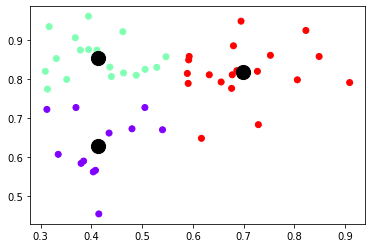

In [15]:
plt.scatter(kmeans_data[:,0],kmeans_data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black', s=200)